<a href="https://colab.research.google.com/github/Sasha-Kirsten/Session-2-Homework/blob/main/Session_2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!wget https://www.kaggle.com/datasets/camnugent/california-housing-prices?datasetId=5227

--2022-09-19 13:28:21--  https://www.kaggle.com/datasets/camnugent/california-housing-prices?datasetId=5227
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘california-housing-prices?datasetId=5227’

california-housing-     [ <=>                ]  20.22K  --.-KB/s    in 0.04s   

2022-09-19 13:28:21 (569 KB/s) - ‘california-housing-prices?datasetId=5227’ saved [20709]



In [3]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


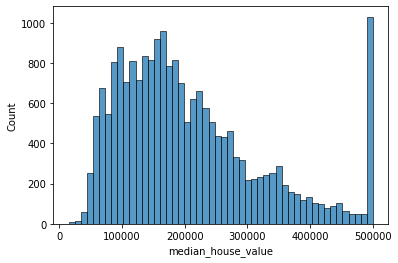

In [4]:
sns.histplot(data.median_house_value, bins=50)

# Question 1
Find a feature with missing values. How many missing values does it have?

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The answer here is 207 missing values for 'total bedrooms'.





# Question 2
What's the median (50% percentile) for variable 'population'?

In [6]:
 data['population'].median()

1166.0

The answer is 1166.0

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Split the data

In [8]:
n = len(data)

n_values = int(n * 0.2)
n_test_values = int(n * 0.2)
n_train_values = n - n_values - n_test_values

idx = np.arange(n)

In [9]:
data_train = data.iloc[:n_train_values]
data_val = data.iloc[n_train_values:n_train_values+n_values]
data_test = data.iloc[n_train_values+n_values:]

In [10]:
df_train = data_train.reset_index(drop=True)
df_values = data_val.reset_index(drop=True)
df_test = data_test.reset_index(drop=True)

In [11]:
y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

In [12]:
np.random.seed(42)
np.random.shuffle(idx)

In [13]:
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

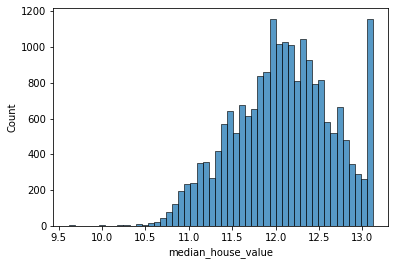

In [14]:
median_value_log = np.log1p(data['median_house_value'])
sns.histplot(median_value_log, bins=50)

# Question 3
We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [15]:
def prepare_X(df, fill_value):
    df_num = df[base]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

In [16]:
base = ['longitude','latitude','housing_median_age','total_rooms',
         'total_bedrooms','population','households','median_income']

In [17]:
X_train1 = prepare_X(data_train, 0)

Here I filled all the missing data with zeros

In [18]:
print(X_train1)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  3.2200e+02  1.2600e+02
   8.3252e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  2.4010e+03  1.1380e+03
   8.3014e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  4.9600e+02  1.7700e+02
   7.2574e+00]
 ...
 [-1.1647e+02  3.3780e+01  2.7000e+01 ...  7.5900e+02  3.4000e+02
   3.3162e+00]
 [-1.1638e+02  3.3730e+01  1.0000e+01 ...  3.8110e+03  1.5700e+03
   4.0079e+00]
 [-1.1637e+02  3.3720e+01  1.7000e+01 ...  3.4970e+03  1.3370e+03
   3.3120e+00]]


In [19]:
mean = data_train.total_bedrooms.mean()

In [20]:
X_train2 = prepare_X( data_train,fill_value=mean)

Here I filled all the missing values with the most frequect values.

**Now we are going to create a linear regression model!!!!**

In [21]:
data_train.iloc[10]

longitude              -122.26
latitude                 37.85
housing_median_age        52.0
total_rooms             2202.0
total_bedrooms           434.0
population               910.0
households               402.0
median_income           3.2031
ocean_proximity       NEAR BAY
Name: 10, dtype: object

Here we are stating to tranform the linear regession into the vector form

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
w0, w = train_linear_regression(X_train1, y_train)

In [24]:
w02, w2 = train_linear_regression(X_train2, y_train)

In [25]:
y_pred = w0 + X_train1.dot(w)

In [26]:
y_pred2 = w0 + X_train2.dot(w)

Now we are going to perform Root Mean Squared Error analysis

In [27]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)
  

In [28]:
rmse(y_train, y_pred)

0.34638064936990265

In [29]:
rmse(y_train, y_pred2)

0.3461890487023143

# The answer to question 3 is that they are equivlent!!!

# Question 4 

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [30]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [31]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train,0 )

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.36258943250411313

In [32]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, 0.000001)

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.36258946211158727

In [33]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train,0.001 )

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3626190037415934

In [34]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, 0.01)

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3628813059488918

In [35]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, 1)

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.37438535017472385

In [36]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, 5)

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3797266033027762

In [37]:
X_train = prepare_X(data_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, 10)

X_val = prepare_X(data_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.38072631324955153

## The answer to the question 4 is when r is 0.

# Question 5

We used seed 42 for splitting the data. 
Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. 
If it's low, then all values are approximately the same.

If it's high, the values are different. 
If standard deviation of scores is low, then our model is stable.

In [39]:
for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
          idx2 = np.arange(n)
          np.random.seed(42)
          np.random.shuffle(idx2)

          data_shuffled = data.iloc[idx2]

          data_train = data.iloc[:n_train_values]
          data_val = data.iloc[n_train_values:n_train_values+n_values]
          data_test = data.iloc[n_train_values+n_values:]

          df_train = data_train.reset_index(drop=True)
          df_values = data_val.reset_index(drop=True)
          df_test = data_test.reset_index(drop=True)

          y_train2 = np.log1p(df_train.median_house_value.values)
          y_val2 = np.log1p(df_values.median_house_value.values)
          y_test2 = np.log1p(df_test.median_house_value.values)

          del df_train['median_house_value']
          del df_values['median_house_value']
          del df_test['median_house_value']

          X_train = prepare_X(data_train, 0)

          w0, w = train_linear_regression(X_train, y_train)

          X_val = prepare_X(df_values, 0)

          y_reg_val = w0 + X_val.dot(w)

          rmse_value = np.round(rmse(y_val2, y_reg_val), 2)

          print(rmse_value)
          print(np.round(np.std(rmse_value),5))

0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0
0.36
0.0


# The answer to the question 5 is 0.0

# Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [40]:
seed = 9

idx_val = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx_val)

df_shuffle = data.iloc[idx]

data_train = data.iloc[:n_train_values].copy()
data_val = data.iloc[n_train_values:n_train_values+n_values].copy()
data_test = data.iloc[n_train_values+n_values:].copy()

frames = [data_train, data_val]
data_train_and_validation = pd.concat(frames)

# df_train = data_train.reset_index(drop=True)
# df_values = data_val.reset_index(drop=True)
df_train_and_validation = data_train_and_validation.reset_index(drop=True)
df_test = data_test.reset_index(drop=True)

# y_train2 = np.log1p(df_train.median_house_value.values)
# y_val2 = np.log1p(df_values.median_house_value.values)
y_train_and_validation = np.log1p(df_train_and_validation.median_house_value.values)
y_test2 = np.log1p(df_test.median_house_value.values)

# del df_train['median_house_value']
# del df_values['median_house_value']
del df_train_and_validation['median_house_value']
del df_test['median_house_value']




In [45]:
X_null_train_and_validation = prepare_X(df_train_and_validation, 0)

w0_train_and_validation, w_train_and_validation = train_linear_regression_reg(X_null_train_and_validation, y_train_and_validation, 0.001)

X_null_test = prepare_X(df_test, 0)

y_train_and_val = w0_train_and_validation + X_null_test.dot(w_train_and_validation)

np.round(rmse(y_test, y_train_and_val), 2)

0.32